# **Ερώτηση Α: Να βρεθεί η βέλτιστη λύση (κανόνας απόφασης) και να υπολογιστεί το ολικό κόστος.**

Αρχικά, σχεδιάζω τις δύο γκαουσιανές κατανομές και τις εκτυπώνω σε κοινό διάγραμμα. Τα όρια του διαγράμματος οριστικοποιήθηκαν ύστερα από δοκιμές με στόχο να αποτυπώνεται το σημαντικό μέρος των συναρτήσεων χωρίς να κρατούνται πολλά μηδενικά στοιχεία.

Θέλω ακρίβεια 3 δεκαδικών ψηφίων, οπότε επιλέγω βήμα 0.001.


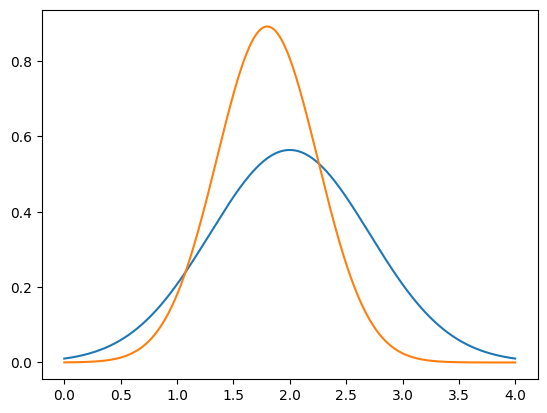

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

global start
global step
global end

# Plot between 0 and 4 with .001 step
start = 0
step = 0.001
end = 4
x_axis = np.arange(start, end, step)

series_parameters = [[2  , sqrt(0.5)],  # p(x|ω1)
                     [1.8, sqrt(0.2)]   # p(x|ω2)
                    ]

px1 = norm.pdf(x_axis,series_parameters[0][0], series_parameters[0][1])
px2 = norm.pdf(x_axis,series_parameters[1][0], series_parameters[1][1])
plt.plot(x_axis, px1)
plt.plot(x_axis, px2)
plt.show()

Σύμφωνα με την θεωρία, το άθροισμα των a priori πιθανοτήτων των καταστάσεων της φύσης ισούται με την μονάδα. Εφόσον εδώ έχω μόνο δύο καταστάσεις (ω1 και ω2), η Ρ(ω2) προκύπτει από την αφαίρεση 1 - Ρ(ω1).

In [ ]:
#  Define the number of the classes
num_classes = 2

# Define a priori probabilities
P1 = 1/4      # Ρ(ω1)
P2 = 1 - P1   # P(ω2)
p = [P1, P2]

# Define cost table
L = [[0, 1], [3, 0] ]

Εφόσον το παρόν πρόβλημα αναφέρεται σε δύο κλάσεις, η λίστα classes αποτελείται από δύο λίστες. Σε κάθε λίστα θα αποθηκεύονται τα x τα οποία ανήκουν σε αυτή.

Η βέλτιστη απόφαση σε ποια κλάση ανήκει κάθε x προκύπτει από τον κανόνα απόφασης Bayes με βάση το δεσμευμένο ρίσκο (αναμενώμενη απώλεια). Στόχος μου είναι να ελαχιστοποιήσω αυτό το ρίσκο. Συνεπώς, η κατηγορία που ανήκει τελικά το x είναι αυτή που παρουσιάζει το μικρότερο ρίσκο.


In [ ]:
classes=[[] for i in range(num_classes)]

for x in range(0, len(x_axis)):
  R1 = L[0][0] * px1[x]*P1  +  L[0][1] * px2[x]*P2  # rist to choose ω1
  R2 = L[1][0] * px1[x]*P1  +  L[1][1] * px2[x]*P2  # risk to choose ω2

  if R1 < R2 :
    classes[0].append(x_axis[x])
  else:
    classes[1].append(x_axis[x])

Προκειμένου να εμφανίζω με όμορφο τρόπο τα διαστήματα του x που αντιστοιχούν σε κάθε κλάση, έγραψα τον ακόλουθο κώδικα. Ουσιαστικά, ελέγχει για το εάν οι τιμές των x που περιέχονται στην λίστα κάθε κλάσης είναι συνεχώμενες. Στο σημείο αυτό τονίζεται ότι εφόσον πρόκειται για δεκαδικούς αριθμούς, για να έχω σωστό αποτέλεσμα στην λογική σύγκριση καλούμαι να στρογγυλοποιήσω σε κάποιο ψηφίο. Εφόσον, η ακρίβεια για το βήμα μου αντιστοχεί σε 3 δεκαδικά ψηφία, αποφάσισα να στρογγυλοποιώ στο 4ο.

Η ανάγκη στρογγυλοποίησης προκύπτει από τον τρόπο που αναπαριστώνται οι αριθμοί κινητής υποδιαστολής στο δυαδικό σύστημα.

Τα όρια των περιοχών ταξινόμησης απεικονίζονται με τις μαύρες κατακόρυφες γραμμές.

Αναγνωρίζω ότι ο κώδικας αυτός δεν είναι βέλτιστος, αλλά λόγω απουσίας επιπλέον χρόνου, δεν πρόλαβα να τον βελτιστοποιήσω.

Σημειώνω ότι ο κώδικας μπορεί να υλοποιηθεί και για προβλήματα με περισσότερες κλάσεις, αρκεί να αυξηθεί το μέγεθος της μεταβλητής classes.


Στην κλάση ω1 ανήκουν τα x που βρίσκονται στο διάστημα:
[0.0,1.075]
[2.259,3.999]
Στην κλάση ω2 ανήκουν τα x που βρίσκονται στο διάστημα:
[1.076,2.258]


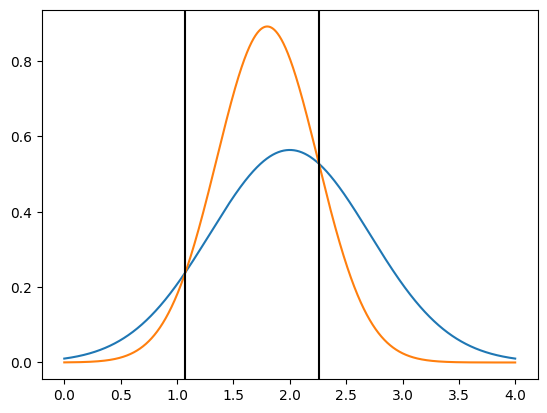

In [ ]:
saved4plot = []
limits = []
for c in range(0, len(classes)):
  # c == 0 --> ω1
  # c == 1 --> ω2

  a = []  # λίστα που αποθηκεύω τα όρια των διαστημάτων των x που ανήκουν σε κάθε κλάση
  x_previous = classes[c][0]

  for x in classes[c]:
    if round(x,4) == round(x_previous+step,4) :
      x_previous = x
    else:
      a.append(round(x_previous, 4))
      a.append(round(x,4))
      x_previous = x

  a.pop(0)  # Deleting the first element because it is added two times, one at the beginning and one at the end of the first interval
  a.append(classes[c][-1]) # Adding the last element to determing the end of the last interval
  limits.append(a)   # saving the limits of each class in order to calculate the total cost

  print("Στην κλάση ω" + str(c+1) + " ανήκουν τα x που βρίσκονται στο διάστημα:")

  if len(a) > 2:
    for i in range(0, len(a), 2):
      print("[" + str(a[i]) + "," + str(a[i + 1]) + "]")
      saved4plot.append(a[i])
      saved4plot.append(a[i+1])
  else:
    print("[" + str(a[0]) + "," + str(a[1]) + "]")

plt.plot(x_axis, px1)
plt.plot(x_axis, px2)
for x in range(1, len(saved4plot)-1):
  plt.axvline(x = saved4plot[x], color = 'black')
plt.show()

Όπως προαναφέρθηκε, τα δείγματα που βρίσκονται στην περιοχή (-∞,1.75)∪(2.26,-∞) ταξινομούνται στην περιοχή ω1, αλλά μπορεί να ανήκουν και στην κλάση ω2. Με άλλα λόγια, το δείγμα μπορεί να ταξινομηθεί στην λάθος κλάση, μία απόφαση που παρουσιάζει κάποιο κόστος. Το ολικό κόστος του ταξινομητή μας είναι το άθροισμα της πιθανότητας να έχουμε επιλέξει την σωστή κλάση επί το αντίστοιχο κόστος συν την πιθανότητα να έχουμε επιλέξει την σωστή κλάση επί το αντίστοιχο κόστος για κάθε κλάση του προβλήματός μας. Η αντίστοιχη μαθηματική περιγραφή είναι:

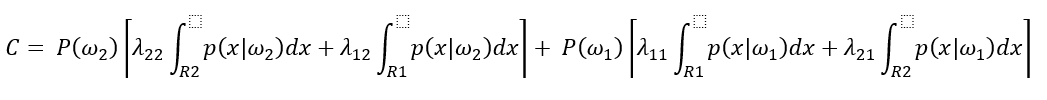

Ο οποίος για τις μη μηδενικές τιμές λij της εκφώνησης παίρνει την μορφή:

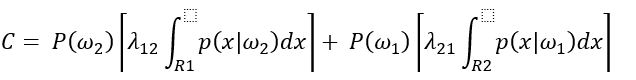


Ο κώδικας που υπολογίζει το ολικό κόστος φαίνεται παρακάτω. Για τον υπολογισμό του ολοκληρώματος, όπως φάνηκε και παραπάνω, χρειάζομαι την συνάρτηση erf η οποία βρίσκεται στην βιβλιοθήκη scipy.special. Αποφάσισα να δημιουργήσω μία συνάρτηση για τον υπολογισμό του ολοκληρώματος ξεχωριστά ώστε ο κώδικας να είναι ευανάγνωστος. Όπως προαναφέρθηκε, το κόστος προκύπτει μονάχα από τα δείγματα που ταξινομήθηκαν στην λάθος κλάση (η σωστή ταξινόμηση δεν επιβραβεύεται), στην συνάρτηση cost_wrong κράτησα μονάχα τις μη μηδενικές τιμές του λ με την σειρά που με βόλευε για την υλοποίηση του κώδικα.

In [ ]:
import scipy.special as sp

def SumOfSeries(m, s, lower_limit, upper_limit):

  if upper_limit + step == end+step:    # inf
    f_upper = sp.erf(float("inf"))
  else:
    f_upper = sp.erf( (round(upper_limit,4)-m)/(sqrt(2)*s) )

  if lower_limit +step == start+step:    # - inf
    f_lower = - sp.erf(float("inf"))
  else:
    f_lower = sp.erf( (lower_limit-m)/(sqrt(2)*s) )

  return 0.5 * ( f_upper - f_lower )

In [ ]:
def cost_wrong(series_parameter, P, L, limits):
  # Προκύπτει από τα δεδομένα της κατανομής που βρίσκονται στην άλλη περιοχή απόφασης. Για αυτό αντιστρέφω την limits

  cost = 0
  L_wrong = [ L[1][0], L[0][1] ] # κρατάω μονάχα τα μη μηδενικά λ με την σειρά που με βολεύει

  limits.reverse()
  for p in range(0, len(P)):

    if len(limits[p]) > 2:
      a = 0
      for i in range(0, len(limits[p]), 2):
        aa = SumOfSeries(series_parameter[p][0], series_parameter[p][1], limits[p][i], limits[p][i+1])
        a += aa
    else:
      a = SumOfSeries(series_parameter[p][0], series_parameter[p][1], limits[p][0], limits[p][1])

    b = L_wrong[p]
    cost += P[p] * b * a

  return cost

cost = cost_wrong(series_parameters, p, L, limits)
print("Total cost is "+str(cost))

Total cost is 0.5636981344722247


# **Ερώτηση Β: Να προσομοιωθεί η διαδικασία υπολογιστικά, δημιουργώντας τυχαία δείγματα που ακολουθούν την κανονική κατανομή, και να εκτιμηθεί αριθμητικά το κόστος από το ερώτημα Α**

Για την δημιουργία των τυχαίων δειγμάτων που ακολουθούν τια κανονικές κατανομές της εκφώνησης χρησιμοποίησα την συνάρτηση random.normal της βιβλιοθήκης numpy.

Με βάση τα γνωστά όρια κάθε κλάσης εξετάζω σε ποιά κλάση ταξινομούνται τα δεδομένα και αυξάνω τον αντίστοιχο μετρητή για την σωστή και την λάθος απόφαση. Έπειτα, διαιρώ την τιμή των μετρητών με το συνολικό πλήθος των δειγμάτων προκειμένου να πάρω το ποσοστό της σωστής και της λάθος ταξινόμησης. Στην συνέχεια υπολογίζω το κόστος κάθε κλάσης με βάση τον τύπο της θεωρίας. Τέλος, προσθέτω τα κόστη των κλάσεων προκειμένου να υπολογίσω το ολικό κόστος.

In [ ]:
samples = 1000
w1 = np.random.normal(series_parameters[0][0], series_parameters[0][1],samples)
w2 = np.random.normal(series_parameters[1][0], series_parameters[1][1], samples)

w1_wrong = 0
w1_right = 0
w2_wrong = 0
w2_right = 0

for point in w1:
  if point >= 1.076 and point <= 2.258:
    w1_wrong += 1
  else:
    w1_right += 1

w1_right = w1_right / samples
w1_wrong = w1_wrong / samples
costw1 = p[0] * ( L[0][0]*w1_right + L[1][0]*w1_wrong )

print("\nData from ω1 that classified in ω1: " + str(w1_right) )
print("Data from ω1 that classified in ω2: " + str(w1_wrong) )
print("Total cost in class ω1: " + str(costw1) )

for point in w2:
  if point >= 1.076 and point <= 2.258:
    w2_right += 1
  else:
    w2_wrong += 1

w2_right = w2_right / samples
w2_wrong = w2_wrong / samples
costw2 = p[1] * ( L[1][1]*w2_right + L[0][1]*w2_wrong )

print("\nData from ω2 that classified in ω1: " + str(w2_wrong) )
print("Data from ω2 that classified in ω2: " + str(w2_right) )
print("Total cost in class ω2: " + str(costw2) )

print("\nTotal cost is: " + str(costw1+costw2) )


Data from ω1 that classified in ω1: 0.46
Data from ω1 that classified in ω2: 0.54
Total cost in class ω1: 0.405

Data from ω2 that classified in ω1: 0.217
Data from ω2 that classified in ω2: 0.783
Total cost in class ω2: 0.16275

Total cost is: 0.56775


Παρατηρώ ότι το κόστος αυτό δεν διαφέρει σημαντικά ούτε από εκείνο που υπολόγισα νωρίτερα αλλά ούτε και από το κόστος που υπολόγισα θεωρητικά. Η παρατήρηση αυτή ήταν αναμενόμενη.